# Van der Pol oscillator


For more information on the model see
[Wikipedia](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator).

## Dynamics

The dynamics of the Van der Pol oscillator are described as follows:

$$
\begin{aligned}
  \dot{x} &= y \\
  \dot{y} &= \mu (1 - x^2) y - x
\end{aligned}
$$
We consider the parameter ``μ = 1``.

In [1]:
using ReachabilityAnalysis, Plots  #hide

@taylorize function vanderPol!(dx, x, params, t)
    local μ = 1.0
    dx[1] = x[2]
    dx[2] = (μ * x[2]) * (1 - x[1]^2) - x[1]
    return dx
end

## Initial-value problem

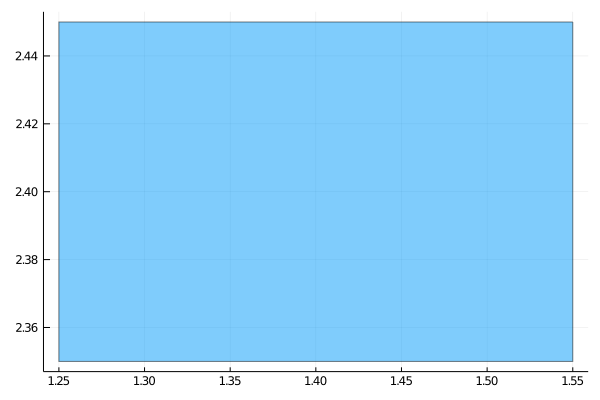

In [2]:
    # set of initial states
    X0 = Hyperrectangle(low=[1.25, 2.35], high=[1.55, 2.45])
    plot(X0)  #hide

In [3]:
    # initial-value problem
    ivp = @ivp(x' = vanderPol!(x), dim: 2, x(0) ∈ X0)

    # time horizon
    tspan = (0.0, 5.0)

(0.0, 5.0)